#Task Objective:Build a model to predict if a new student will find placement or not based on determined attributes

In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
students = pd.read_csv(r"E:\My Python codes\Placement_Data_Full_Class.csv", index_col = ["sl_no"], squeeze = True)
students.sort_index(inplace = True)

students

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [20]:
students['salary']=students['salary'].fillna(0)
students

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [21]:
students_df = pd.get_dummies(students, columns=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'])
students_df['status'] = students_df['status'].replace(['Placed','Not Placed'],['1','0']).astype(float)
students_df1 = students_df.astype(float)
students_df1 = students_df1[["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary","gender_F","gender_M","ssc_b_Central","ssc_b_Others","hsc_s_Arts","hsc_s_Commerce","hsc_s_Science","degree_t_Comm&Mgmt","degree_t_Others","degree_t_Sci&Tech","workex_No","workex_Yes","specialisation_Mkt&Fin","specialisation_Mkt&HR","status"]]
students_df1

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status
sl_no,,,,,,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,79.33,78.33,77.48,86.5,66.28,200000.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,65.00,68.00,64.00,75.0,57.80,250000.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,56.00,52.00,52.00,66.0,59.43,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5,85.80,73.60,73.30,96.8,55.50,425000.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
212,58.00,60.00,72.00,74.0,53.62,275000.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
213,67.00,67.00,73.00,59.0,69.72,295000.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [22]:
students_df1['status'].sum()/students_df1['status'].shape[0]

0.6883720930232559

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler

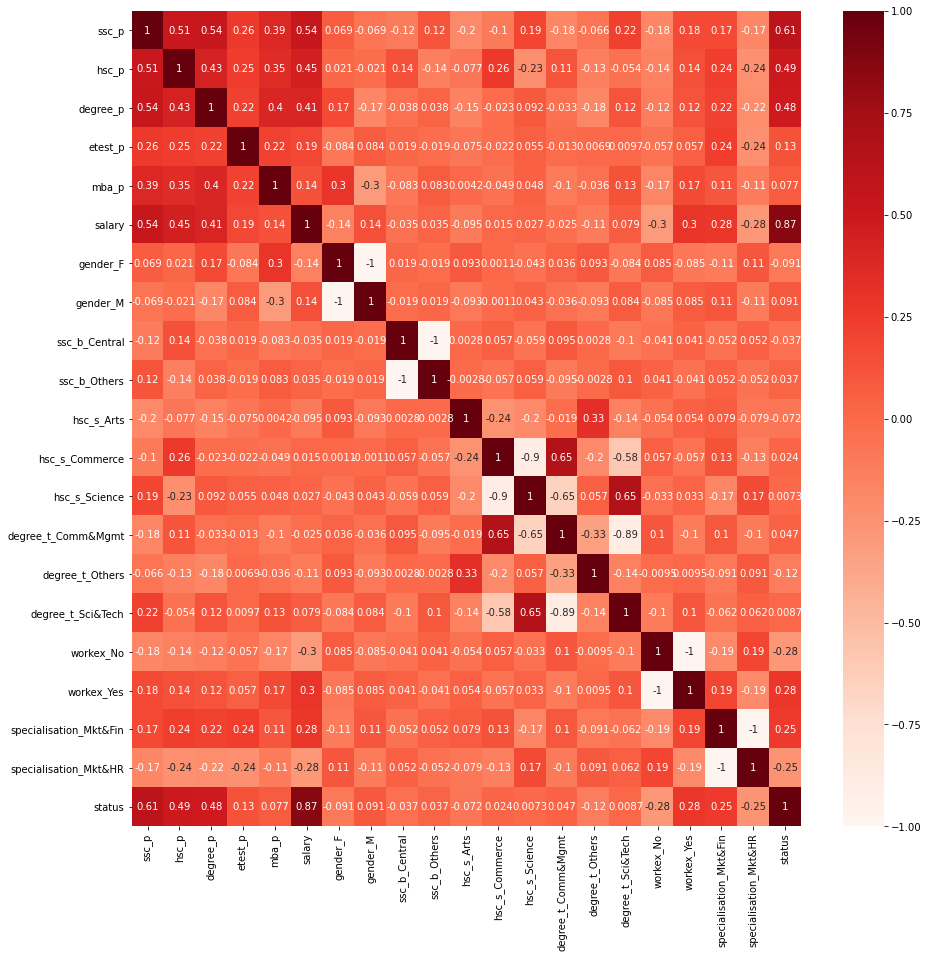

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(students_df1.corr(),annot=True,cmap=plt.cm.Reds)
plt.show()


In [25]:
cor = students_df1.corr()
cor_target = abs(cor["status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features


ssc_p     0.607889
salary    0.865774
status    1.000000
Name: status, dtype: float64

In [26]:
#select your train and test data and drop salary as it shows high correlation with status
target_name = 'status'
X = students_df1.drop(['status','salary'], axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = students_df1[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [27]:
def CMatrix(CM, labels=['Placed','Not Placed']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [28]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'], 
                      columns=['LogisticReg','RandomForest','NaiveBayes','KNN'])
metrics

,LogisticReg,RandomForest,NaiveBayes,KNN
accuracy,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN


#Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
# 1. Create an instance of the estimator
log_reg1 = LogisticRegression()

# 2. Use the trainning data to train the estimator
log_reg1.fit(X_train, y_train)

# 3. Evaluate the model
log_pred = log_reg1.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=log_pred, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=log_pred, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=log_pred, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=log_pred, y_true=y_test)
CMatrix(CM)


PREDICTION,Placed,Not Placed,Total
TRUE,,,
Placed,13,7,20
Not Placed,4,41,45
Total,17,48,65


#Random forest

In [30]:

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth= 4, max_features= 'auto',random_state=42)

random_forest.fit(X_train, y_train)

random_pred = random_forest.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=random_pred, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=random_pred, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=random_pred, y_true=y_test)

CM = confusion_matrix(y_pred=random_pred, y_true=y_test)
CMatrix(CM)

PREDICTION,Placed,Not Placed,Total
TRUE,,,
Placed,15,5,20
Not Placed,1,44,45
Total,16,49,65


#Naive bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

NBC = GaussianNB()

NBC.fit(X_train, y_train)

nbc_pred = NBC.predict(X_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=nbc_pred, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=nbc_pred, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=nbc_pred, y_true=y_test)

CM = confusion_matrix(y_pred=nbc_pred, y_true=y_test)
CMatrix(CM)

PREDICTION,Placed,Not Placed,Total
TRUE,,,
Placed,14,6,20
Not Placed,9,36,45
Total,23,42,65


#KNN

In [32]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test) 
metrics.loc['accuracy','KNN'] = accuracy_score(y_pred=knn_pred, y_true=y_test)
metrics.loc['precision','KNN'] = precision_score(y_pred=knn_pred, y_true=y_test)
metrics.loc['recall','KNN'] = recall_score(y_pred=knn_pred, y_true=y_test)

CM = confusion_matrix(y_pred=knn_pred, y_true=y_test)
CMatrix(CM)

PREDICTION,Placed,Not Placed,Total
TRUE,,,
Placed,12,8,20
Not Placed,3,42,45
Total,15,50,65


In [33]:
100*metrics

,LogisticReg,RandomForest,NaiveBayes,KNN
accuracy,83.0769,90.7692,76.9231,83.0769
precision,85.4167,89.7959,85.7143,84
recall,91.1111,97.7778,80,93.3333


Random Forest performs better as it has highest recall

And now let's predict an individual instance

In [34]:

random_forest.predict([[30, 50, 20, 50, 49, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]])



array([1.])

PROJECT ONGOING...